# Análise de Eficiência: Modalidades de Marketing

# Informação da base de dados
## O que vamos analisar?
Registros de campanhas de marketing de um produto, separado por investimentos em milhares de dólares.
## Por que esta análise é importante?
Podemos direcionar os investimentos de marketing de um produto específico para o meio que traz o melhor custo benefício.
## Para quem a análise é feita?
Setor de marketing e financeiro responsável pelo produto.

# Pode-se encontrar o banco de dados em: https://www.kaggle.com/datasets/brsahan/advertising-spend-vs-sales/data

## Dicionário de dados:
1. TV - Milhares de dólares investidos em marketing de televisão.
2. radio - Milhares de dólares investidos em marketing de radio.
3. newspaper - Milhares de dólares investidos em marketing de jornais.
4. sales - Vendas de produtos em milhares de unidades.

## Importando Bibliotécas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Extração de banco de dados

In [119]:
df = pd.read_csv("C:/Users/ovinn/Desktop/kaggle/Advertising.csv")

## Pré-Análise


In [120]:
df.head (5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [121]:
df.tail (5)

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Verificado que existem apenas dados quantitativos no banco de dados, não existem dados qualitativos.

In [123]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [85]:
df.duplicated().sum()

0

Aqui podemos observar que não há valores nulos ou duplicados. Portanto não há necessidade de alteração no banco de dados.

In [86]:
df.describe ()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Outliers

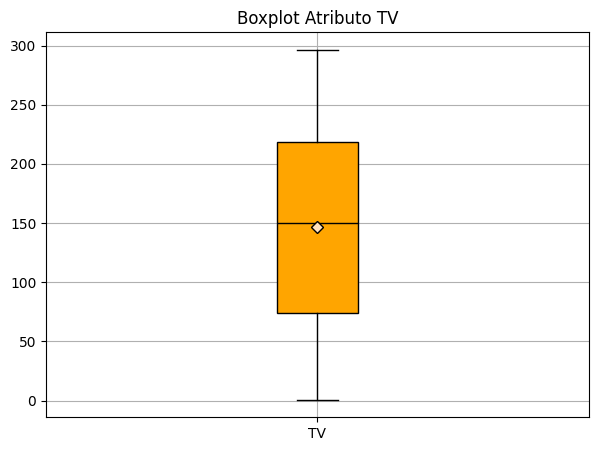

In [134]:
plt.figure(figsize=(7, 5))
df.boxplot(column='TV',
           patch_artist=True,
           boxprops=dict(facecolor='orange', color='black'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           showmeans=True,
           meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='#ffe0be'))
plt.title('Boxplot TV')
plt.show()

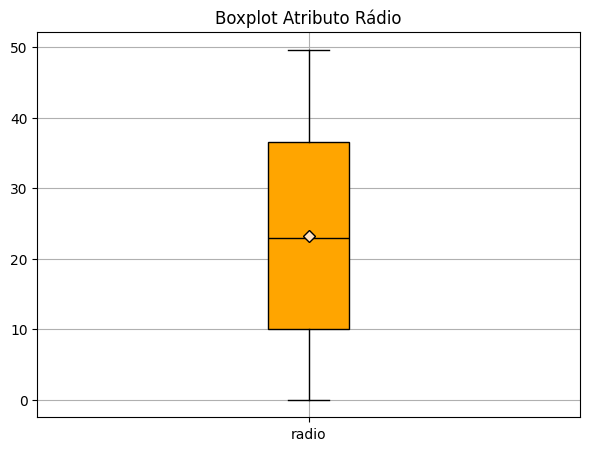

In [133]:
plt.figure(figsize=(7, 5))
df.boxplot(column='radio',
           patch_artist=True,
           boxprops=dict(facecolor='orange', color='black'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           showmeans=True,
           meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='#ffe0be'))
plt.title('Boxplot Rádio')
plt.show()

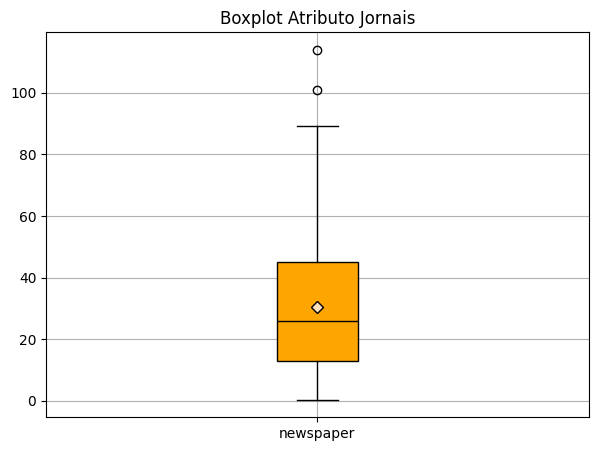

In [135]:
plt.figure(figsize=(7, 5))
df.boxplot(column='newspaper',
           patch_artist=True,
           boxprops=dict(facecolor='orange', color='black'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           showmeans=True,
           meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='#ffe0be'))
plt.title('Boxplot Jornais')
plt.show()

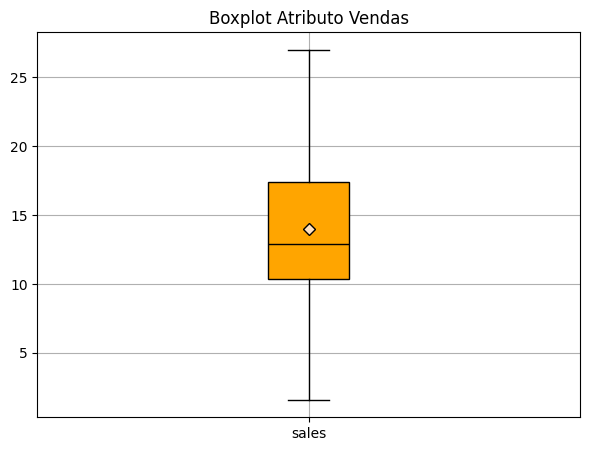

In [136]:
plt.figure(figsize=(7, 5))
df.boxplot(column='sales',
           patch_artist=True,
           boxprops=dict(facecolor='orange', color='black'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           showmeans=True,
           meanprops=dict(marker='D', markeredgecolor='black', markerfacecolor='#ffe0be'))
plt.title('Boxplot Atributo Vendas')
plt.show()

Pode-se notar que os valores apresentados em "Jornais" apresentam duas entradas acima do padrão, entretanto os valores permanecerão, visto que estão dentro da realidade e não são erros.
As demais colunas apresentam valores dentro da normalidade.

In [105]:
df.shape

(200, 4)

# Tratamento

#### Tradução do DF.

In [146]:
df.rename(columns={'newspaper': 'jornais',
                   'sales': 'vendas'},inplace=True)

In [107]:
df

,TV,radio,jornais,vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Histograma

Text(0.5, 1.0, 'Frequência de investimento em marketing de TV')

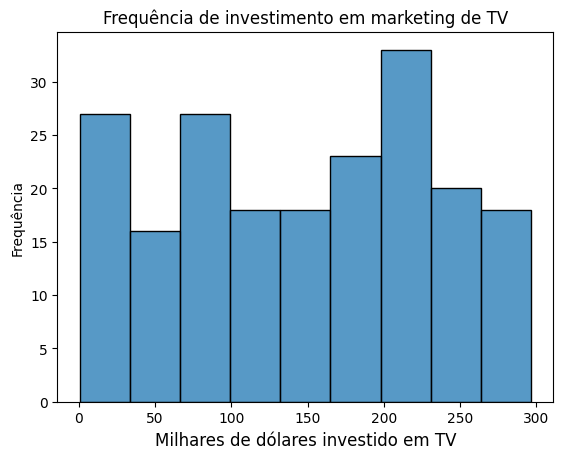

In [142]:
sns.histplot(data=df, x="TV", kde=False)
plt.xlabel('Milhares de dólares investido em TV',fontsize=12)
plt.ylabel('Frequência')
plt.title('Frequência de investimento em marketing de TV')

### Rádio

Text(0.5, 1.0, 'Frequência de investimento em marketing de Rádio')

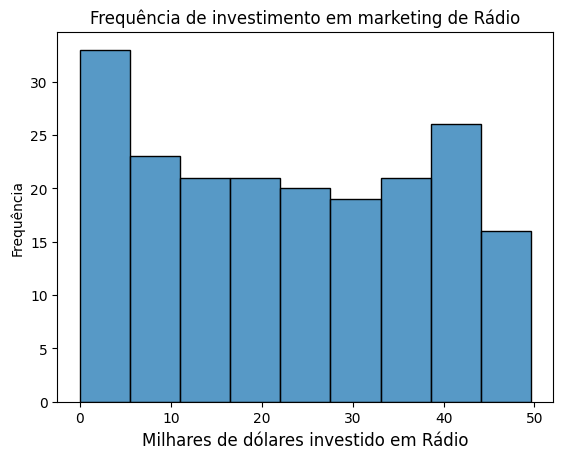

In [143]:
sns.histplot(data=df, x="radio", kde=False)
plt.xlabel('Milhares de dólares investido em Rádio',fontsize=12)
plt.ylabel('Frequência')
plt.title('Frequência de investimento em marketing de Rádio')

### Jornais

Text(0.5, 1.0, 'Frequência de investimento em marketing de Jornais')

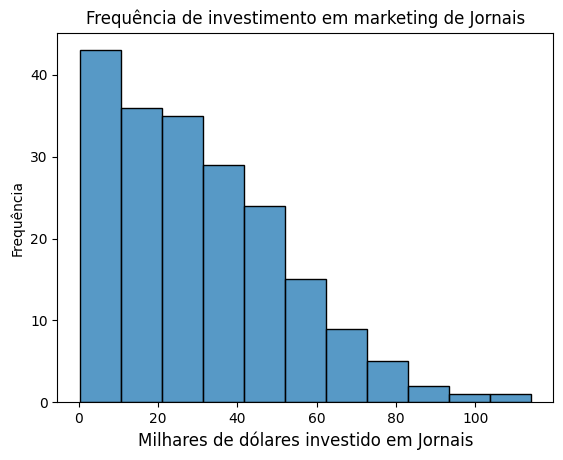

In [148]:
sns.histplot(data=df, x="jornais", kde=False)
plt.xlabel('Milhares de dólares investido em Jornais',fontsize=12)
plt.ylabel('Frequência')
plt.title('Frequência de investimento em marketing de Jornais')

É possível determinar que o comportamento natural para esta empresa é de investimentos maiores e mais frequêntes na modalidade marketing televisivo.

## Gráficos de distribuição - Modalidade x Vendas

### TV

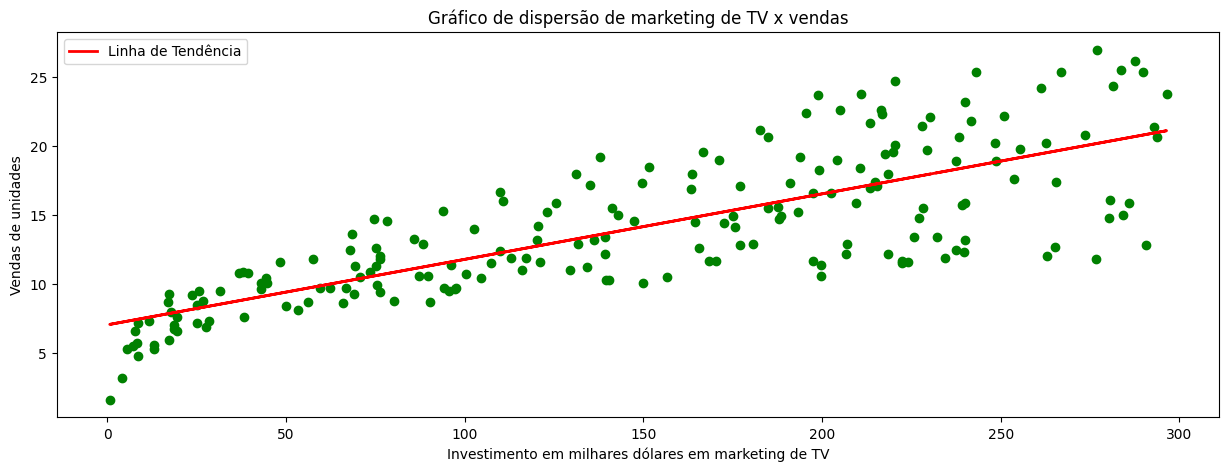

In [163]:
plt.figure(figsize=(15, 5))
plt.scatter(df["TV"], df["vendas"], c='green')
plt.xlabel("Investimento em milhares dólares em marketing de TV")
plt.ylabel("Vendas de unidades")
plt.title(f"Gráfico de dispersão de marketing de {"TV"} x {"vendas"}")
slope, intercept = np.polyfit(df['TV'], df['vendas'], 1)
y_fit = slope * df['TV'] + intercept
plt.plot(df['TV'], y_fit, color='red', lw=2, label='Linha de Tendência')
plt.legend()

### Rádio

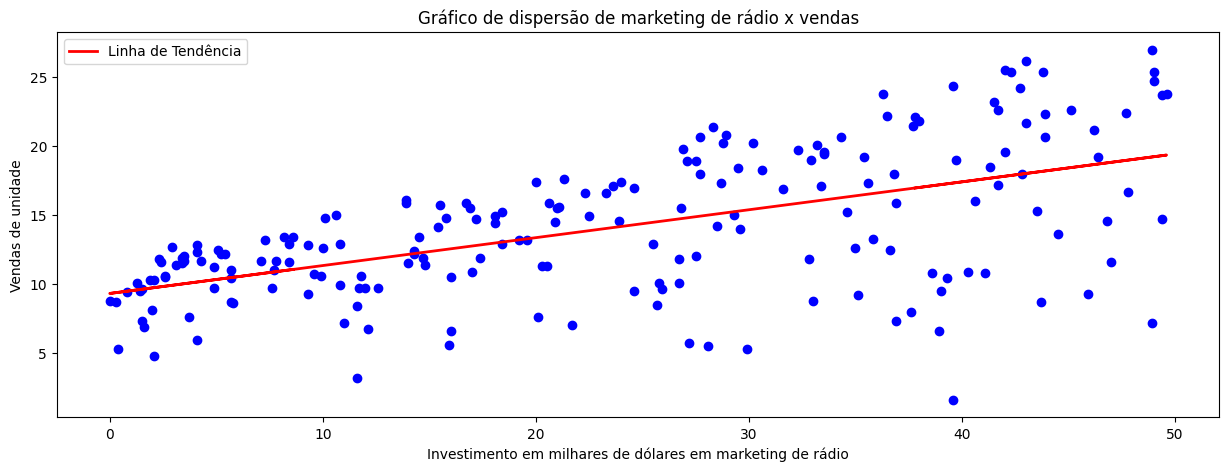

In [164]:
plt.figure(figsize=(15, 5))
plt.scatter(df["radio"], df["vendas"], c='blue')
plt.xlabel("Investimento em milhares de dólares em marketing de rádio")
plt.ylabel("Vendas de unidade")
plt.title('Gráfico de dispersão de marketing de rádio x vendas')
slope, intercept = np.polyfit(df['radio'], df['vendas'], 1)
y_fit = slope * df['radio'] + intercept
plt.plot(df['radio'], y_fit, color='red', lw=2, label='Linha de Tendência')
plt.legend()

### Jornais

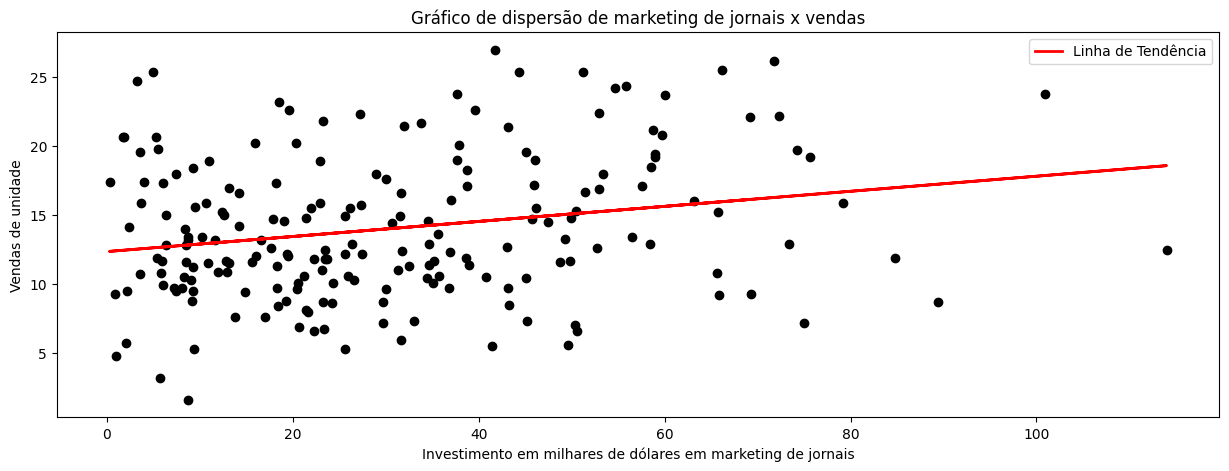

In [165]:
plt.figure(figsize=(15, 5))
plt.scatter(df["jornais"], df["vendas"], c='black')
plt.xlabel("Investimento em milhares de dólares em marketing de jornais")
plt.ylabel("Vendas de unidade")
plt.title("Gráfico de dispersão de marketing de jornais x vendas")
slope, intercept = np.polyfit(df['jornais'], df['vendas'], 1)
y_fit = slope * df['jornais'] + intercept
plt.plot(df['jornais'], y_fit, color='red', lw=2, label='Linha de Tendência')
plt.legend()

É possivel notar uma relação forte e crescente entre investimentos na área de marketing de TV e o as vendas unitárias do produto. Para as relações de investimento em rádio e jornais, é notável um vínculo menor com as vendas unitárias. Será analisado a seguir com a correlação de Pearson.

## Correlação de Pearson

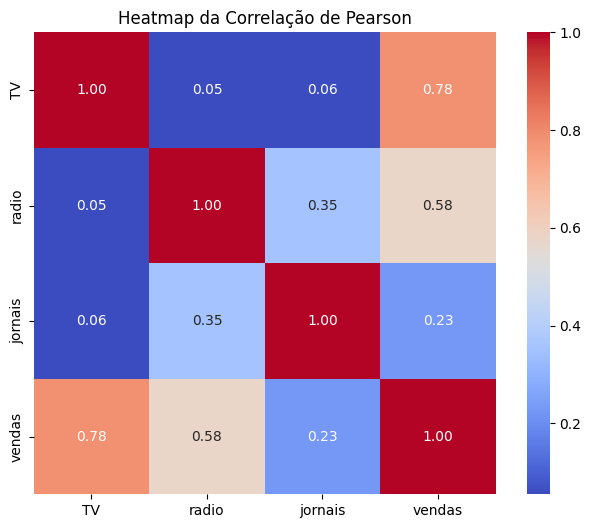

In [175]:
pearson = df.corr (method='pearson')
plt.figure(figsize=(8,6))
sns.heatmap(pearson, annot=True, cmap='coolwarm',  fmt=".2f" , square=True)
plt.title("Heatmap da Correlação de Pearson")
plt.show()

Aqui é possível comprovar, com um índice de 0,78 pontos, a relação de investimento em marketing de TV com as vendas dos produtos, embasando a decisão da empresa por optar por este segmento.